In [13]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/gbromley/Dropbox/code/python_utilities/')
from python_data_functions import extract_months
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

In [2]:
### data sources ###
data_dir = '/Users/gbromley/data/wrf_output/'
t2m_fallow = xr.open_dataset(data_dir+'modland/Q2_fallow_mon.nc')
t2m_non_fallow =  xr.open_dataset(data_dir+'test/'+'T2Q2_nonfallow_mon.nc')

season = 'MJ'
months=[5,6]
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

In [3]:
fallow_mj = t2m_fallow['Q2'].sel(XTIME=extract_months(t2m_fallow['Q2']['XTIME.month'],months[0],months[-1])).mean(dim='XTIME')

nonfallow_mj = t2m_non_fallow['Q2'].sel(XTIME=extract_months(t2m_non_fallow['Q2']['XTIME.month'], months[0],months[-1])).mean(dim='XTIME')




In [18]:
diff = nonfallow_mj - fallow_mj 

In [20]:
diff = diff * 1000.0

In [24]:
diff

<xarray.DataArray 'Q2' (south_north: 174, west_east: 224)>
array([[ 1.3215467e-03, -3.7113205e-04,  8.8103116e-04, ...,
         6.1746687e-03,  5.9138983e-03,  4.4936314e-03],
       [ 1.0826625e-02,  1.2977049e-02,  1.5809201e-03, ...,
         3.2192096e-02,  2.2980385e-02,  5.2060932e-03],
       [ 1.0840595e-02,  7.7928416e-03,  6.4428896e-03, ...,
         4.0158629e-02,  2.6024878e-02,  4.1145831e-03],
       ...,
       [ 4.9397349e-03, -5.2769482e-01,  2.6430935e-02, ...,
        -2.6542693e-05,  1.2093224e-03, -1.1641532e-05],
       [ 1.2661330e-03,  1.5575904e-02,  1.6657636e-02, ...,
        -3.3853576e-04,  8.6193904e-04,  2.3376197e-04],
       [ 2.7110800e-03,  7.1204267e-03,  1.2377277e-02, ...,
         1.1282973e-03,  1.2246892e-03,  1.5790574e-03]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -118.96222 ... -83.15137
    XLAT     (south_north, west_east) float32 36.538887 36.558495 ... 54.75895
Dimensions without coordinates: south_north, west_east

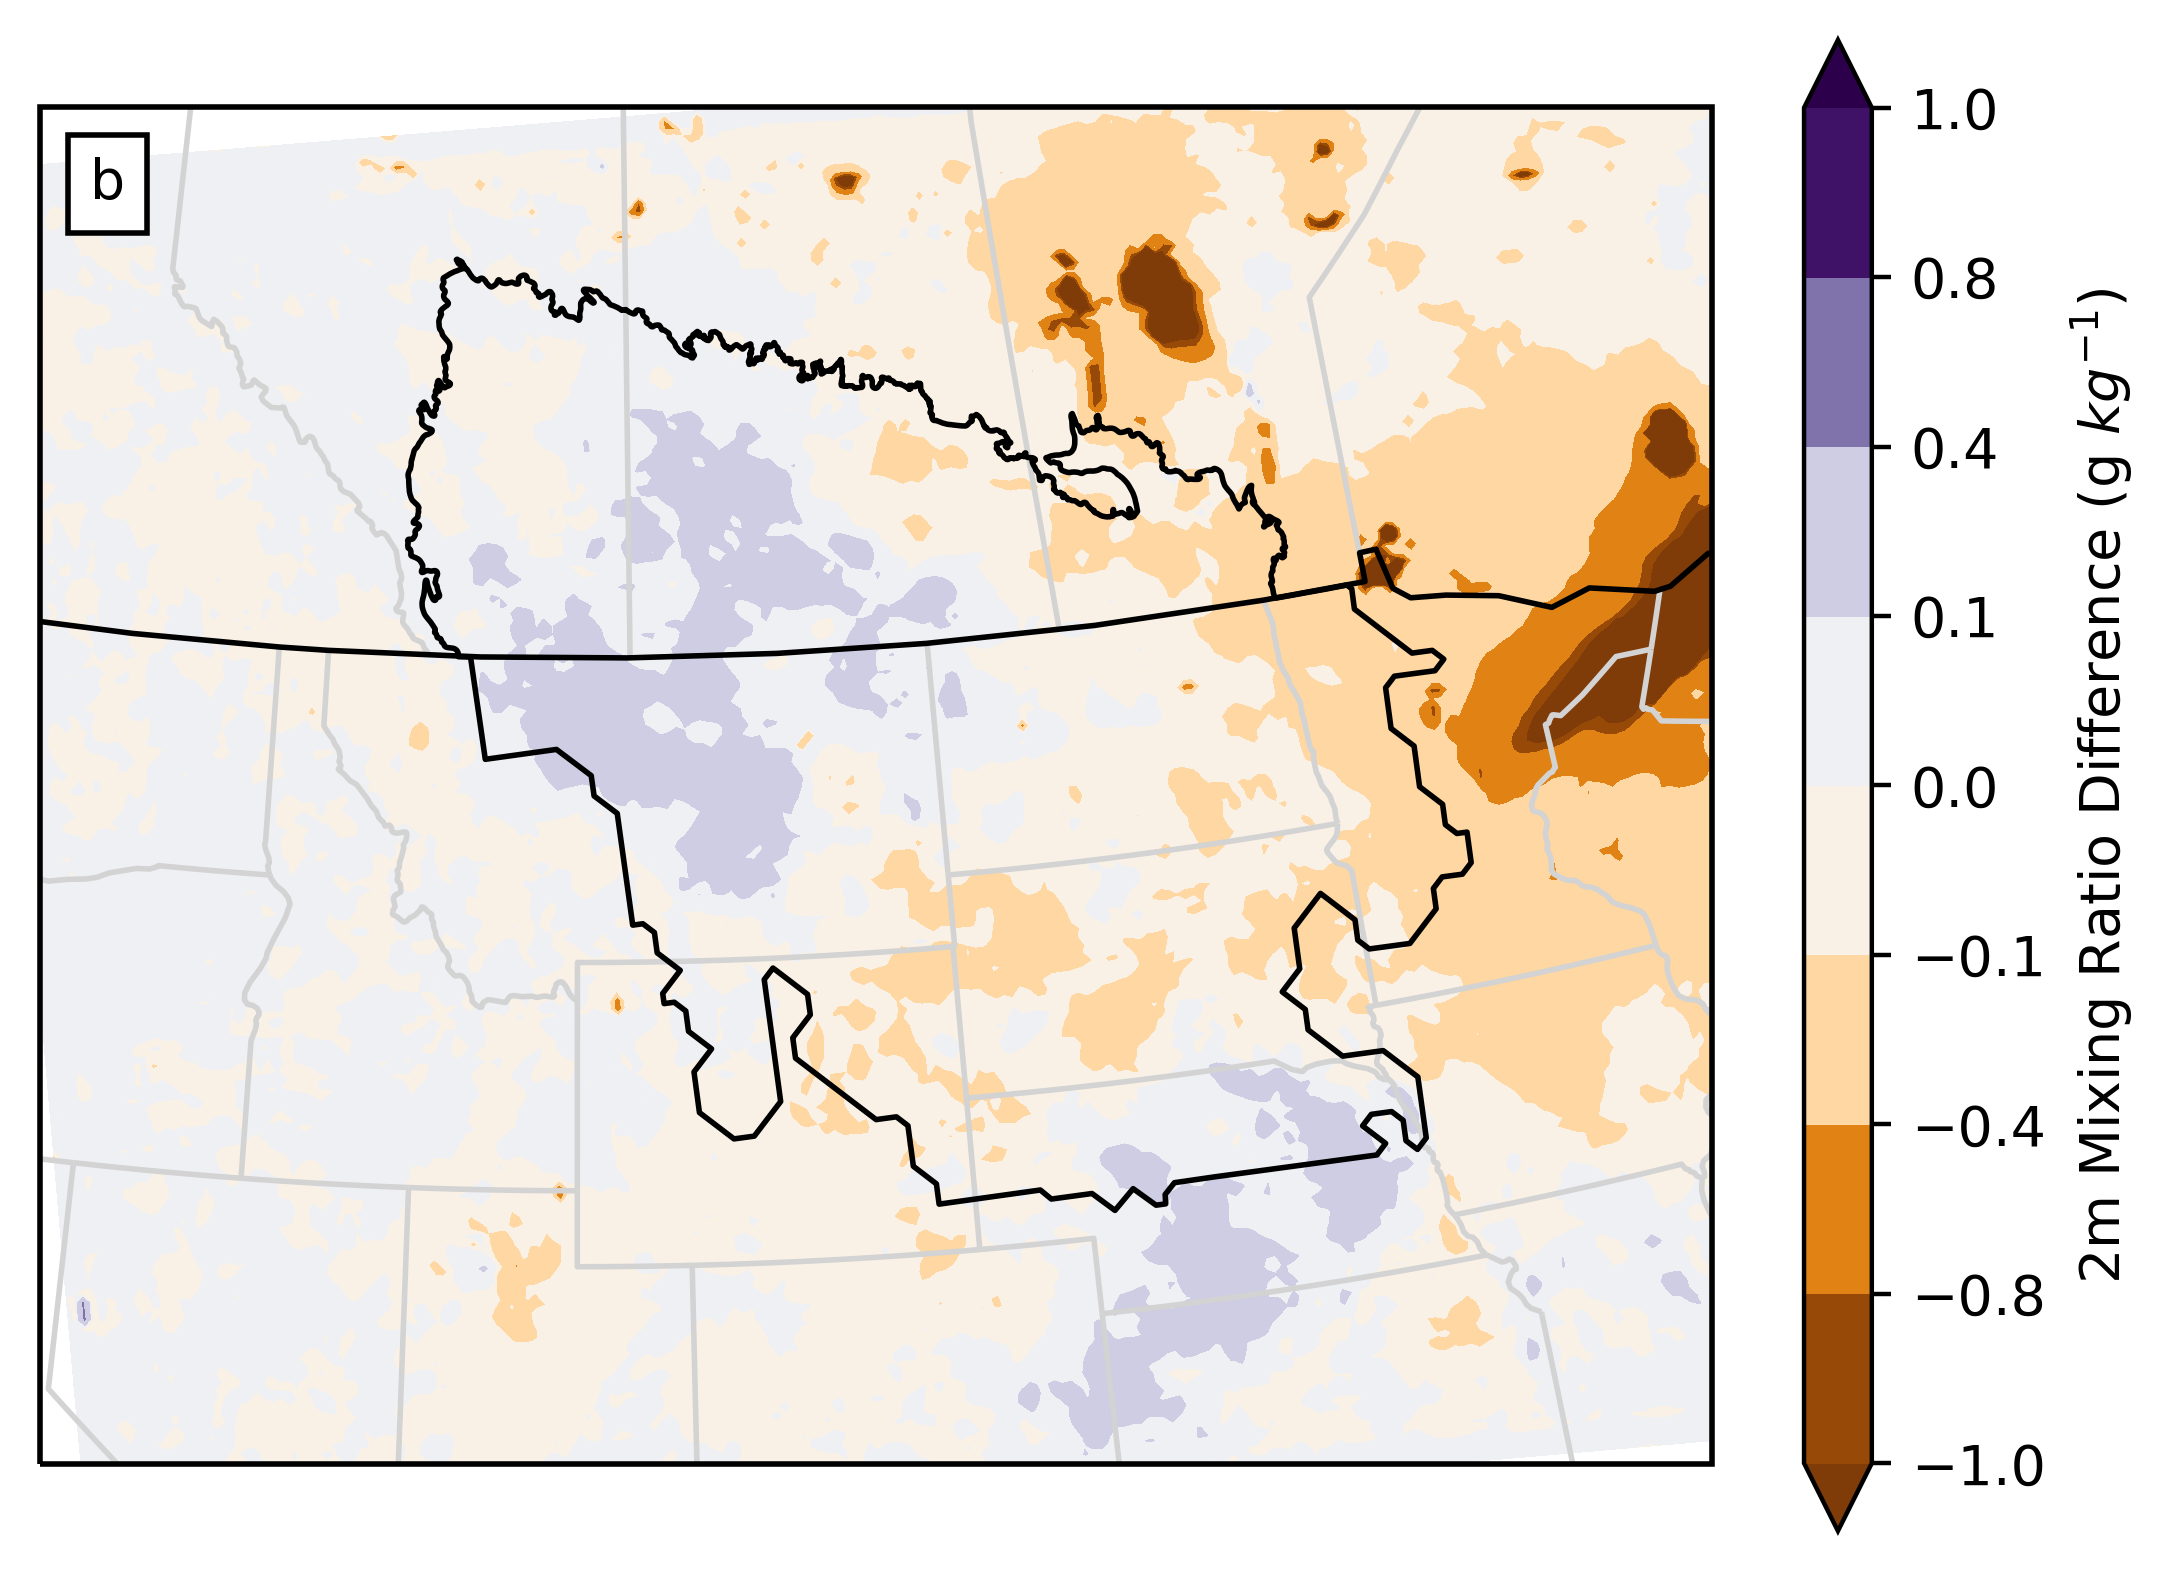

In [23]:

levs = [-1,-0.8,-0.4,-.1,0,.1,.4,.8,1]

fig = plt.figure(1,figsize=(13,7), dpi=400.0)
projection = ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=46.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None)
ax1 = plt.subplot(1,2,1, projection = projection)

plot = plt.contourf(diff.XLONG,diff.XLAT,diff[:,:].values,transform=ccrs.PlateCarree(),levels=levs,cmap='PuOr', extend='both')




ax1.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces, edgecolor='lightgray')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax1.add_feature(shape_feature)
anchored_text = AnchoredText("b", loc=2)
ax1.add_artist(anchored_text)

ax1.title.set_visible(False)
cb = plt.colorbar(plot, cmap='PuOr',fraction=0.037)
cb.set_label(r'2m Mixing Ratio Difference (g $kg^{-1}$)',fontsize=10)


In [ ]:
months = [0,1,2,3,4,5,6,7,8,9,10,11]
for month in months:
    DIFF[month] = WRF.isel(XTIME=month) - CRU.isel(time=month)
